In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pathToProject = 'D:\Work\WorkSpace\CLionProjects\Perepechin-polynomial-approximation\cmake-build-debug-mingw-x64\\'
files = [
    'taylor_sin.csv', 
    'legendre_sin.csv', 
    
    'chebyshev_sin.csv',
         ]

In [31]:
def createPlt():
    plt.figure(figsize=(14, 6))
    plt.ylim(0, 1)
    
    styles = ['-', '--', '-.', ':']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    for idx, file in enumerate(files):
        data = pd.read_csv(pathToProject + file, delimiter=';')
        style = styles[idx % len(styles)]
        color = colors[idx % len(colors)]
        plt.plot(data['step'], data['result'], linestyle=style, color=color, label=file[:-4])

    plt.xlabel('Step')
    plt.ylabel('Result')
    plt.title('График данных')
    plt.grid(True)
    plt.legend()  # Добавление легенды
    
    return plt

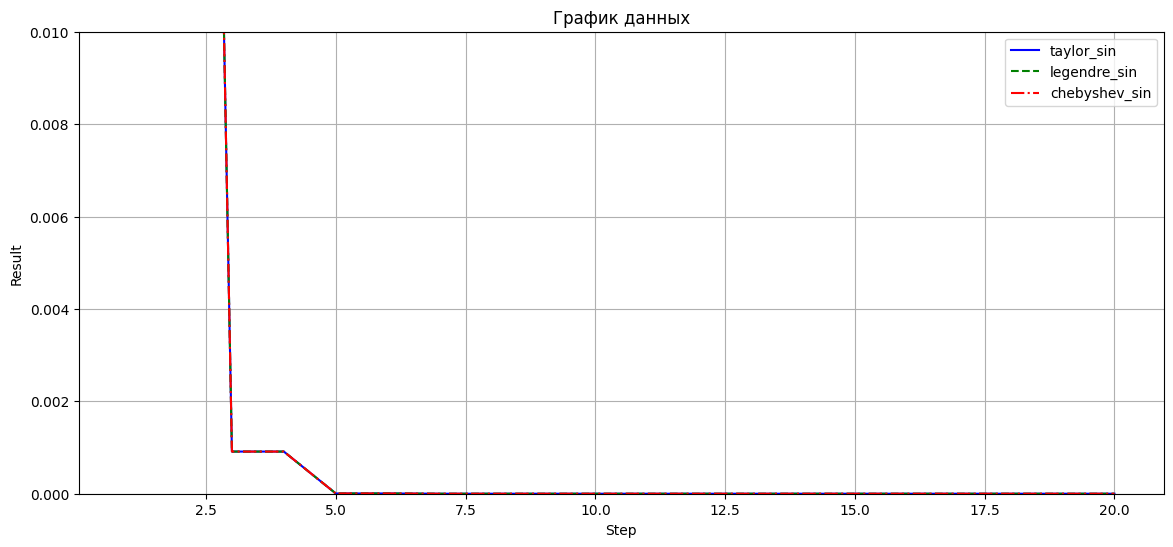

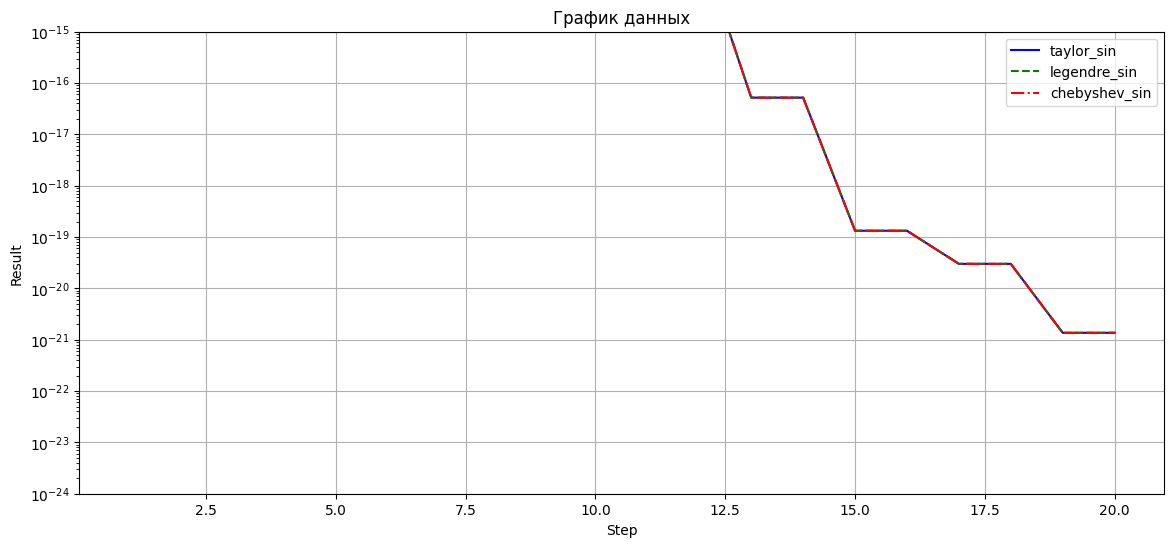

In [32]:
plt = createPlt()
plt.legend(loc='upper right')
plt.ylim(1e-16, 1e-2)
plt.show()

plt = createPlt()
plt.ylim(1e-24, 1e-15)
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()